## TRAIN DATA AS df, TEST DATA AS test

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## CHECKING FOR NULL VALUES

In [14]:
#CHECKING FOR NULL VALUES
print(f'Null values in training dataset: {df.isnull().sum().sum()}')
print(f'Null values in test dataset: {test.isnull().sum().sum()}')


Null values in training dataset: 0
Null values in test dataset: 0


## MANUALLY SPLITTING THE DATA

In [15]:
# Extract features and labels from your data
x_train = df.drop(columns=['label']).values
y_train = df['label'].values
# Extract features from the test dataset (assuming there is no 'label' column)
x_test = test.values

## RESHAPING THE DATA i.e images are 28 X 28 PIXELS

In [16]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

## PLOTTING 3 RANDOM SAMPLES

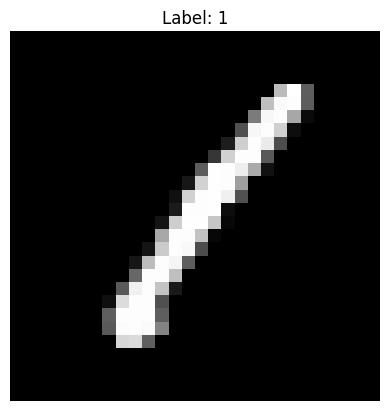

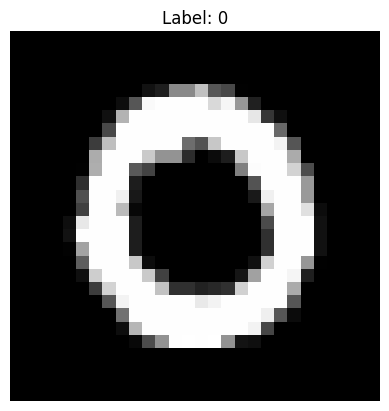

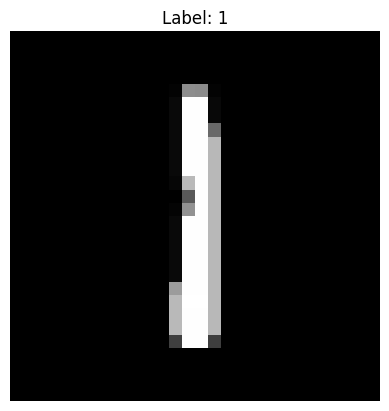

In [17]:
import matplotlib.pyplot as plt


# Plot the first image from the training set
for i in range(0,3):
    plt.imshow(x_train[i], cmap='gray')  # Assuming images are grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

## CREATING A CNN MODEL

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## TRAINING THE MODEL

In [23]:

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1)


Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.8108 - loss: 1.0560 - val_accuracy: 0.9776 - val_loss: 0.0729
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 0.9843 - val_loss: 0.0519
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9850 - val_loss: 0.0486
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 29s 48ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0.9824 - val_loss: 0.0611
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.9915 - loss: 0.0246 - val_accuracy: 0.9824 - val_loss: 0.0557
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9852 - val_loss: 0.0468
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9879 - val_loss: 0.0424
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.9938 - loss: 0.0193 - 

### Fortunately, the training accuracy was higher than the validation accuracy which indicates good training.

## MAKING PREDICTIONS

In [24]:
predictions = model.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


## PLOTTING SOME PREDICTIONS

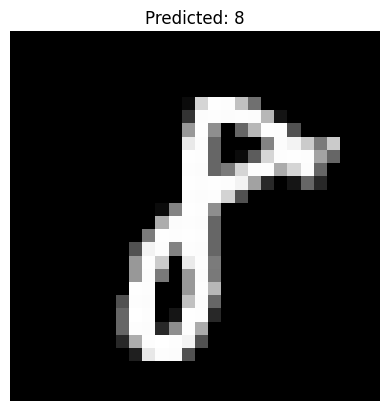

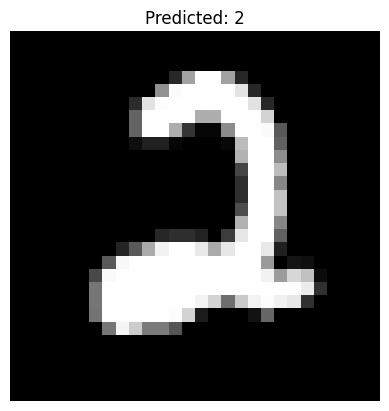

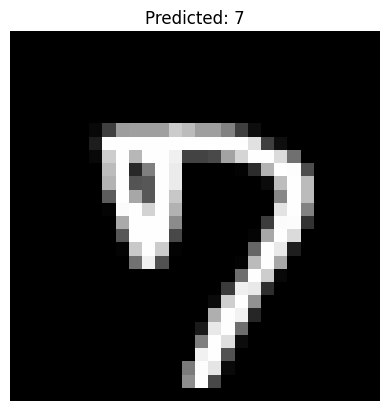

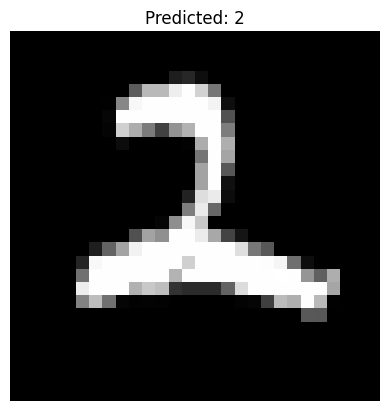

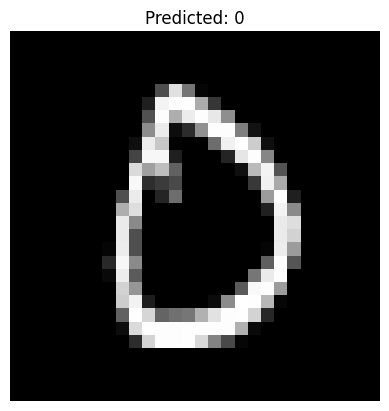

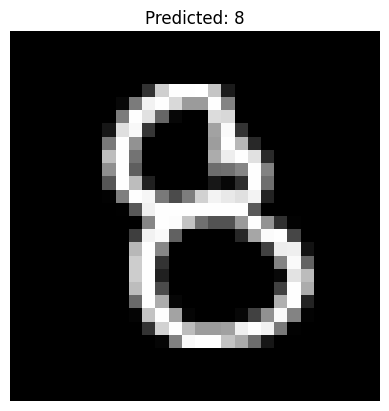

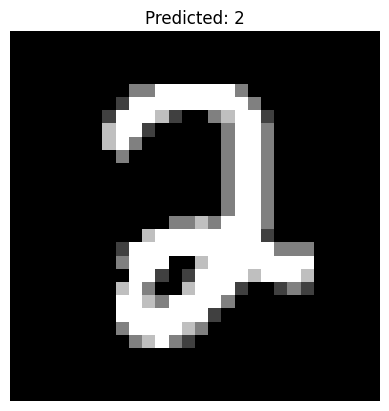

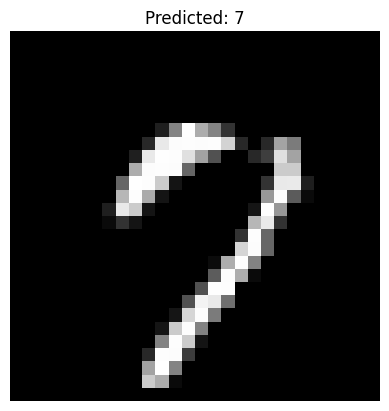

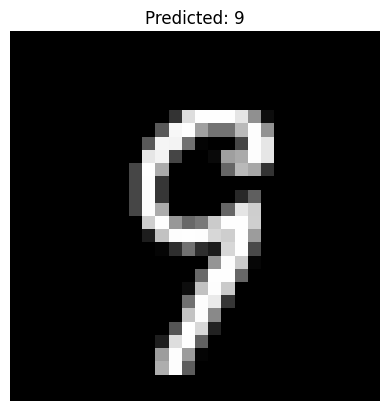

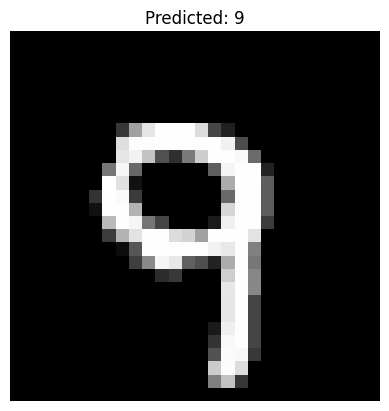

In [25]:
import matplotlib.pyplot as plt

# Choose a random subset of test samples for visualization
num_samples = 10
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

# Visualize the predictions
for i in random_indices:
    # Get the predicted label for the current sample
    predicted_label = np.argmax(predictions[i])
    
    # Display the image and the predicted label
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

## DISPLAYING PREDICTIONS IN TABULAR FORMAT

In [26]:
# Convert predictions to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame to store predictions
data = {
    'ImageID': range(1, len(predicted_labels) + 1),  # Assuming image IDs start from 1
    'PredictedLabel': predicted_labels
}
predictions_df = pd.DataFrame(data)

# Display the predictions DataFrame as a table
print(predictions_df)

       ImageID  PredictedLabel
0            1               2
1            2               0
2            3               9
3            4               8
4            5               3
...        ...             ...
27995    27996               9
27996    27997               7
27997    27998               3
27998    27999               9
27999    28000               2

[28000 rows x 2 columns]


In [ ]:
import pandas as pd

# Convert predictions to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame to store predictions
data = {
    'ImageID': range(1, len(predicted_labels) + 1),  # Assuming image IDs start from 1
    'Label': predicted_labels
}
predictions_df = pd.DataFrame(data)

# Define the file path to save the CSV file
csv_file_path = "predictions.csv"

# Save predictions DataFrame to CSV file
predictions_df.to_csv(csv_file_path, index=False)

print("Predictions saved successfully in:", csv_file_path)


Predictions saved successfully in: predictions.csv
